# Part 2: Single Linear Neuron
## (ii)

### Step 1: Obtaining the Target Linear Equation 
First, train a linear regression model over a sufficient number of training cycles ($epochs = 10000$). The purpose of this step is to obtain a relatively accurate linear equation that can be used as a target for subsequent training.

Epoch 0: MSE = 0.5449998965517242
Epoch 1000: MSE = 0.02196966409105371
Epoch 2000: MSE = 0.015931611711767005
Epoch 3000: MSE = 0.01513767697610413
Epoch 4000: MSE = 0.015011961271772012
Epoch 5000: MSE = 0.014988417809495277
Epoch 6000: MSE = 0.014983287365591905
Epoch 7000: MSE = 0.014982005435515562
Epoch 8000: MSE = 0.014981642988566796
Epoch 9000: MSE = 0.014981528409717905
Final MSE: 0.014981488345096942
R^2 Score: 0.7204888662094103
Final equation of the line: y = -0.7723x + 0.9566


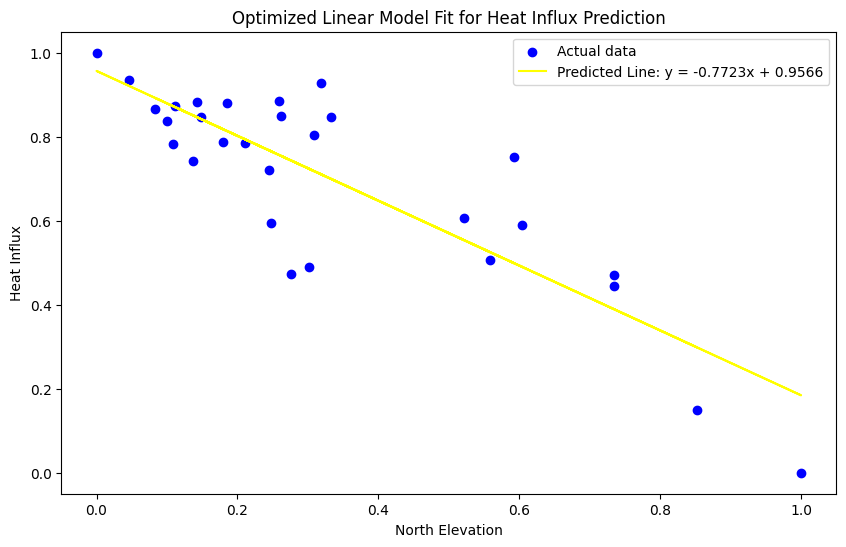

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('heat_influx_noth_south.csv')

# Initialize weights and bias
np.random.seed(42)
weight = 0.0  
bias = 0.0  

# Learning rate
learning_rate = 0.01

# Define the number of epochs
epochs = 10000

# Training loop
# Using standard gradient descent methods
for epoch in range(epochs):
    inputs = data['North'].values
    targets = data['HeatFlux'].values

    # Compute predictions
    predictions = weight * inputs + bias
    
    # Compute the error
    errors = targets - predictions
    
    # Compute mean squared error
    mse = (errors**2).mean()

    # Gradient descent
    weight_gradient = -2 * np.dot(errors, inputs) / len(inputs)
    bias_gradient = -2 * errors.mean()

    # Update weights
    weight -= learning_rate * weight_gradient
    bias -= learning_rate * bias_gradient

    # Adjust learning rate
    learning_rate *= 0.9999  # Gradual decay of learning rate

    # Logging at certain intervals
    # The MSE is output every 1000 cycles in order to observe changes in model performance.
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: MSE = {mse}")

# Final predictions and evaluation
final_predictions = weight * data['North'].values + bias
final_mse = mean_squared_error(data['HeatFlux'].values, final_predictions)
r2 = r2_score(data['HeatFlux'].values, final_predictions)

print(f"Final MSE: {final_mse}")
print(f"R^2 Score: {r2}")

# Print the final equation of the line
print(f"Final equation of the line: y = {weight:.4f}x + {bias:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['North'], data['HeatFlux'], color='blue', label='Actual data')
plt.plot(data['North'], final_predictions, color='yellow', label=f'Predicted Line: y = {weight:.4f}x + {bias:.4f}')
plt.title('Optimized Linear Model Fit for Heat Influx Prediction')
plt.xlabel('North Elevation')
plt.ylabel('Heat Influx')
plt.legend()
plt.show()


### Step 2: Setting Initial Parameters 
After obtaining an accurate linear equation $y = -0.7723x + 0.9566$, I can use the parameters $w = -0.7723$ and $b = 0.9566$ of this equation as initial parameters for subsequent training. The purpose of this is to reduce the amount of tuning required for the model to achieve similar performance over a limited number of training cycles ($epochs = 3000$).
### Step 3: Adjust the learning rate and the learning rate decay strategy 
In order to quickly approximate the target equation within a limited number of training cycles, I can adjust the learning rate and its decay strategy appropriately. A higher initial learning rate will allow us to quickly approach the target value at the beginning of the training period, while an appropriate decay will reduce the excessive oscillations when approaching the target and maintain the stability of the training. Set `learning_rate = 0.01` (higher initial learning rate) and `learning_rate_decay = 0.9995` (mild decay).
### Step 4: Training in a finite number of cycles 
Using the initial weights, bias and learning rate configurations set above, the model is trained in a finite number of $epochs = 3000$ cycles. This phase of training still uses the gradient descent algorithm, but since the starting point is closer to the final target, the model will be able to achieve higher accuracy in a shorter period of time.

Epoch 0: MSE = 0.014981491659791037
Epoch 300: MSE = 0.014981475904994022
Epoch 600: MSE = 0.014981469432704172
Epoch 900: MSE = 0.014981466122122268
Epoch 1200: MSE = 0.014981464300656108
Epoch 1500: MSE = 0.014981463233696092
Epoch 1800: MSE = 0.014981462574128628
Epoch 2100: MSE = 0.014981462147086967
Epoch 2400: MSE = 0.014981461859372703
Epoch 2700: MSE = 0.014981461658782051
Final MSE: 0.014981461514757207
R^2 Score: 0.7204893667857554
Final equation of the line: y = -0.7728x + 0.9568


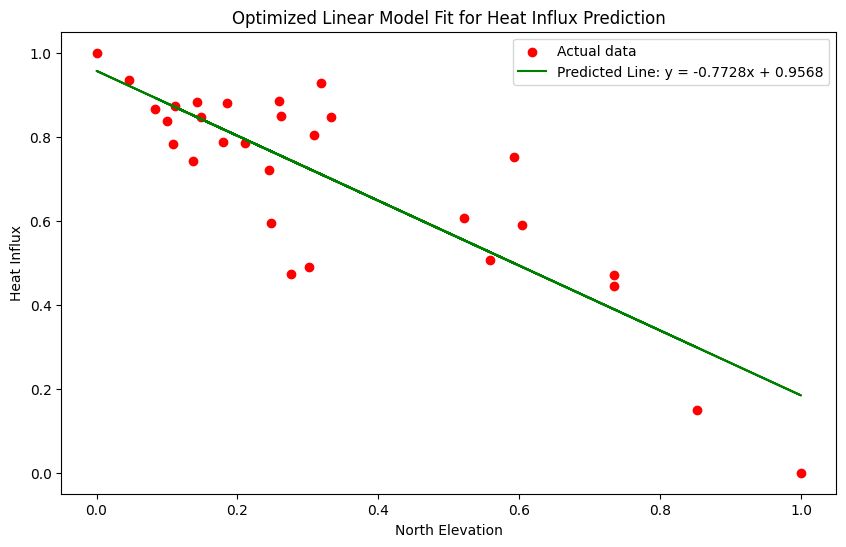

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('heat_influx_noth_south.csv')

# Initialize weights and bias close to the target values
weight = -0.7723  # Starting close to the target weight
bias = 0.9566  # Starting close to the target bias

# Learning rate
learning_rate = 0.01  # Starting learning rate

# Define the number of epochs
epochs = 3000  # Fixed number of epochs

# Training loop
for epoch in range(epochs):
    inputs = data['North'].values
    targets = data['HeatFlux'].values

    # Compute predictions
    predictions = weight * inputs + bias
    
    # Compute the error
    errors = targets - predictions
    
    # Compute mean squared error
    mse = (errors**2).mean()

    # Gradient descent
    weight_gradient = -2 * np.dot(errors, inputs) / len(inputs)
    bias_gradient = -2 * errors.mean()

    # Update weights
    weight -= learning_rate * weight_gradient
    bias -= learning_rate * bias_gradient

    # Adjust learning rate - Gradual decay
    learning_rate *= 0.9995  # Slightly gentler decay

    # Logging at certain intervals
    # The MSE is output every 300 cycles in order to observe changes in model performance.
    if epoch % 300 == 0:
        print(f"Epoch {epoch}: MSE = {mse}")

# Final predictions and evaluation
final_predictions = weight * data['North'].values + bias
final_mse = mean_squared_error(data['HeatFlux'].values, final_predictions)
r2 = r2_score(data['HeatFlux'].values, final_predictions)

print(f"Final MSE: {final_mse}")
print(f"R^2 Score: {r2}")
print(f"Final equation of the line: y = {weight:.4f}x + {bias:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['North'], data['HeatFlux'], color='red', label='Actual data')
plt.plot(data['North'], final_predictions, color='green', label=f'Predicted Line: y = {weight:.4f}x + {bias:.4f}')
plt.title('Optimized Linear Model Fit for Heat Influx Prediction')
plt.xlabel('North Elevation')
plt.ylabel('Heat Influx')
plt.legend()
plt.show()
